# Electrical characteristic analysis of sample CA12X2

In [1]:
paths = ['../CA12X2/CA12X2_current_from_1e-9_to_10e-9A/CA12X2_current_from_1e-9_to_10e-9A-20220315151857',
'../CA12X2/CA12X2_current_from_10e-9_to_100e-9A/CA12X2_current_from_10e-9_to_100e-9A-20220315151525',
'../CA12X2/CA12X2_current_from_100e-9_to_200e-9A/CA12X2_current_from_100e-9_to_200e-9A-20220315152213',
'../CA12X2/CA12X2_current_from_200e-9_to_300e-9A/CA12X2_current_from_200e-9_to_300e-9A-20220315152513',
'../CA12X2/CA12X2_current_from_1e-6_to_2e-6A/CA12X2_current_from_1e-6_to_2e-6A-20220317143643',
'../CA12X2/CA12X2_current_from_0.1e-6_to_1.5e-6A/CA12X2_current_from_0.1e-6_to_1.5e-6A-20220317150657',
'../CA12X2/CA12X2_current_from_0.1e-6_to_1.0e-6A/CA12X2_current_from_0.1e-6_to_1.0e-6A-20220317151236']

data_path = paths[1]

with open(data_path, "r", encoding='utf-8') as file_desc:
    text = file_desc.read()
    print(text)

Electrical characterization experiment of current biased Ca2RuO4 crystal along C-axis as a function of temperature with 2-wire connection
Sample name: CA12X2
Area: 4.807e-2cm2
Length: 0.2376e-1cm
Current source from 10e-9A to 100e-9A

### Experiment 20220315151525 ###
Date 2022-03-15 start at 15:12:34 end at 15:15:05 duration 0:02:31
Temperature range from 113.45°K to 113.44°K
Resistivity:
	 average 1.3721e+08𝛀 cm
	 minimum 2.0229e+07𝛀 cm at 113.44°K
	 maximum 1.4100e+09𝛀 cm at 113.45°K
Voltage:
	 average 2.4044e+00V
	 minimum 1.3916e-01V at 113.45°K
	 maximum 1.1953e+01V at 113.45°K



<img src="../CA12X2/Ca12x2_Info/camp_ca12x2.jpg" width=500 />

## Diffrattogramma

![title](../CA12X2/Ca12x2_Info/Ca_X2_drx.JPG)

## Loading experiment data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from datetime import datetime

plt.rcParams['figure.figsize'] = [20, 6]

In [3]:
data = np.load(data_path + '.npz', allow_pickle=True)
DT=data['datetime']
V=data['voltage']
R=data['resistance']
T=data['temperature']
I=data['current_source']
J=data['current_density']
E=data['electric_field']
RHO=data['resistivity']
thickness = V/E
area = I/J
# Density in mA/cm2
J = J * 1000

### Data description

- DT datetime
- V voltage measurements in Volts
- R resistance measurements in Ohm
- T temperature measurements in °K
- I current source in Amps
- J current density in mA/cm^2
- E electric field in V/cm
- RHO resistivity in Ohm cm

In [4]:
print(f"Area {area[0]:.4e}cm2\nThickness:{thickness[0]:.4e}cm")

Area 4.8070e-02cm2
Thickness:2.3760e-02cm


### Temperature

In [5]:
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
     print(f"Temperature is constant: {T[0]:.2f}°K")   
elif diff <= 1: 
    print(f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K")
else:
    print(f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K")


Temperature is constant: 113.45°K


### Input source

In [6]:
if I[0] == I[-1]: 
    print(f"Source is constant: {I[0]:.2e}A ({J[0]:.2e}mA/cm2)")
else:
    print(f"Source span from {np.min(I):.2e}A ({np.min(J):.2e}mA/cm2) to {np.max(I):.2e}A ({np.max(J):.2e}mA/cm2)")


Source span from 1.00e-08A (2.08e-04mA/cm2) to 1.00e-07A (2.08e-03mA/cm2)


## Analysis

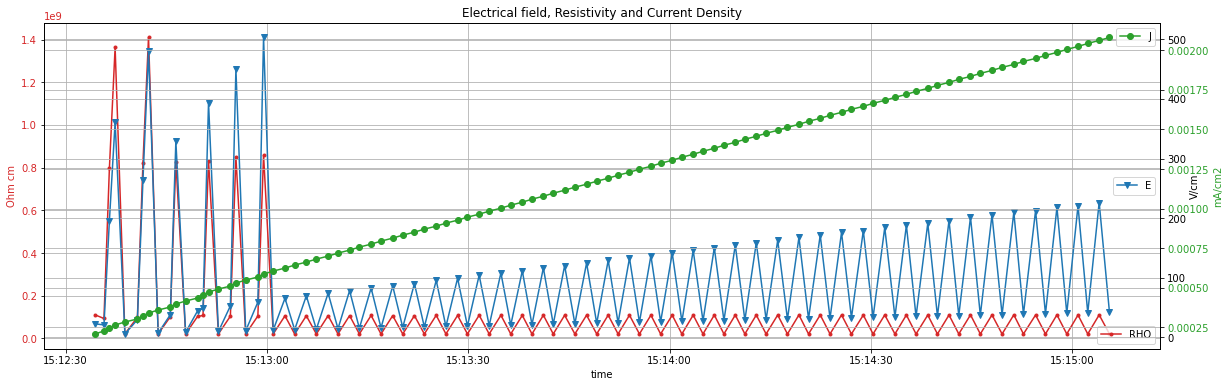

In [7]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current Density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, '.-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, 'v-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()
ax3.set_ylabel('mA/cm2', color='C2')
ax3.tick_params(axis='y', labelcolor='C2')
ax3.plot(DT, J, 'o-', label='J', color='C2')
ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax3.legend(loc='upper right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

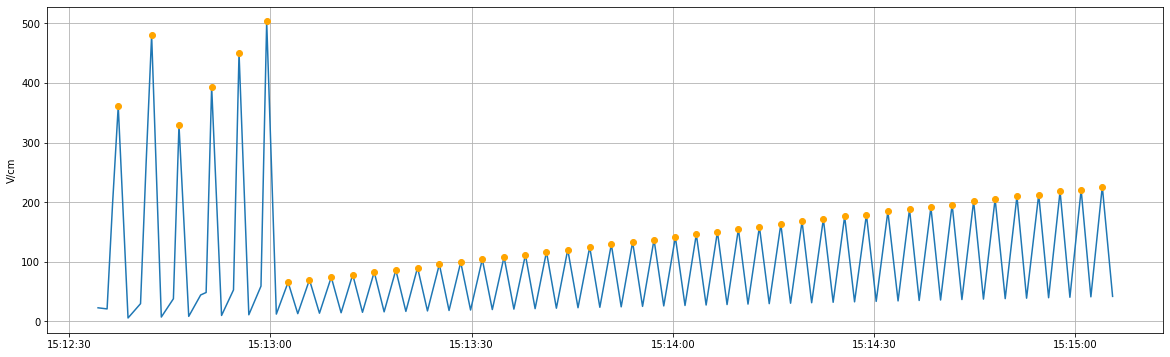

In [8]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
#plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [9]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at {J[peaks[0]]:.2e} mA/cm2\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at {J[peaks[-1]]:.2e} mA/cm2")

First peak with value 360.9 V/cm, 1.363e+09 Ohm cm at 2.65e-04 mA/cm2
Last peak  with value 226.3 V/cm, 1.10e+08 Ohm cm at 2.06e-03 mA/cm2


#### Peaks amplitude

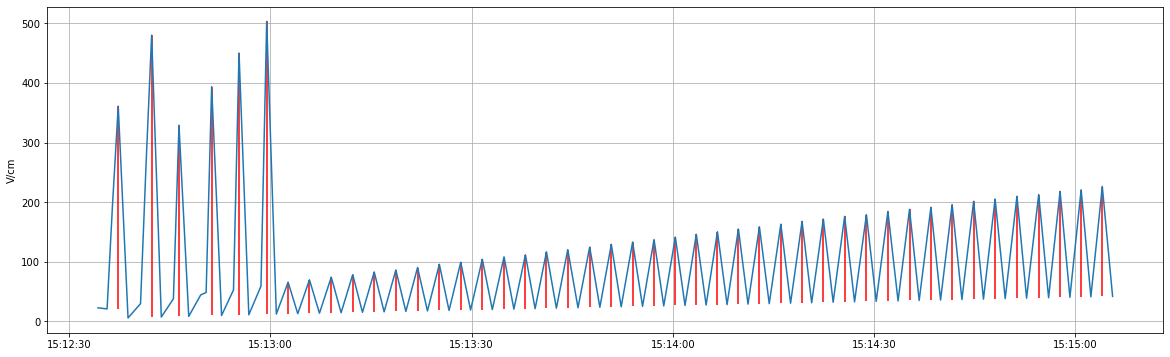

In [10]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [11]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at {J[np.argmin(diff)]:.2e} mA/cm2 \
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at {J[np.argmax(diff)]:.2e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 52.7 V/cm at 3.22e-04 mA/cm2       
Maximum amplitude 490.7 at V/cm at 3.03e-04 mA/cm2      
Average amplitude 157.0 V/cm


#### Time interval between peaks [ms]

Average 3332 milliseconds


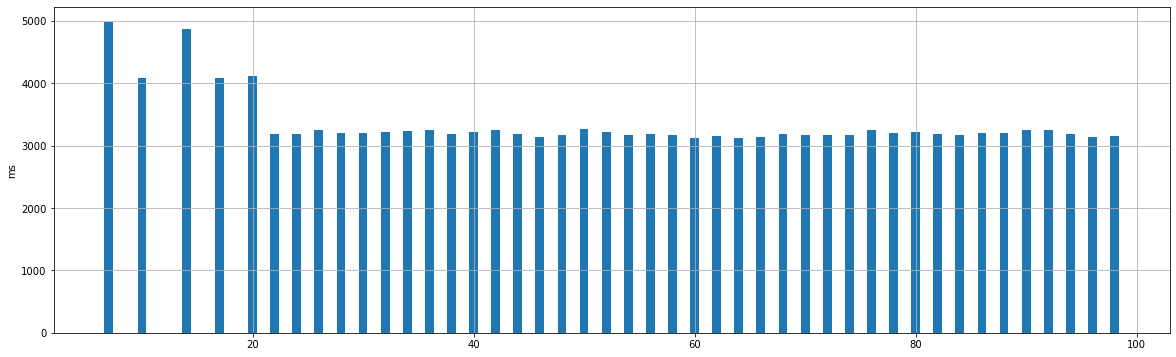

In [12]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")

#### Distance between peaks

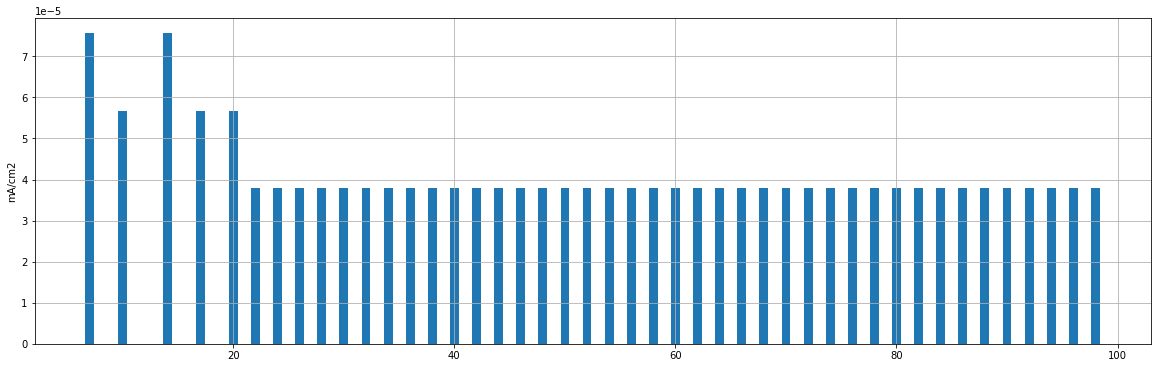

In [13]:
diff = np.ediff1d(J[peaks])
plt.ylabel('mA/cm2')
plt.bar(peaks[1:], diff)
plt.grid(True)

In [14]:
print(np.array2string(diff, formatter={'float_kind':lambda diff: "%.3e" % diff}), "mA/cm2")

[7.565e-05 5.674e-05 7.565e-05 5.674e-05 5.674e-05 3.782e-05 3.782e-05
 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05
 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05
 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05
 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05
 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05 3.782e-05
 3.782e-05 3.782e-05] mA/cm2
